# **데이터 분석 전문가 과정을 위한 실기 문제**

일시: 2022년 10월 11일

# 🤖 **동일한 구조의 데이터프레임을 빠르게 합치는 방법**

업무 자동화에 포함되는 간편한 파이썬 기능

In [ ]:
# 1) 먼저 코랩에서 구글 드라이브와의 연동을 진행시켜야 합니다.
# 제가 설명하는대로 작동이 안되시는 분은 아래의 코드를 실행해 주시면 연결이 될 겁니다.
# 중간에 동의해야 한다는 문구가 나올텐데, 동의를 해주시면 됩니다.
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import glob # 파일명을 리스트 형태로 반환해주는 라이브러리
filepath = '/content/drive/MyDrive/빅데이터분석_공학/sales' # 구글 드라이브에서 파일이 저장되어 있는 경로를 지정
output = glob.glob(filepath + '/*.csv') # csv로 끝이나는 모든 파일에 대해서 불러와 파일의 전체 경로를 "리스트" 형태로 저장
print(output) # 로컬환경을 기준으로 생각을 한다면, 특정 폴더에 어떤 파일들이 들어있는지를 저장

In [ ]:
## 파일의 경로를 기반으로, 하나씩 불러온뒤 자동으로 합쳐주는 과정을 진행
import pandas as pd
df_all = pd.concat((pd.read_csv(f, header = 0) for f in output)) # concat는 영어의 concatenate의 약자로, '이어주다','연결시키다'의 의미를 지님

In [ ]:
df_all.shape

In [ ]:
df_all.head()

In [ ]:
df_all.isnull().sum()

In [ ]:
df_all.head()

## **결측치 제거**

판다스 dropna() method의 공식문서 --> dropna()에 대한 상세한 정보를 원하시는 분은 아래의 링크에서 확인하실 수 있습니다.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

pandas의 경우 공식문서에 다양한 정보를 제공하고 있으니, 관련 기능에 대한 검색을 통해서 다양한 사용방법에 관해서 익히실 수 있습니다.

In [ ]:
# dropna()를 활용해서 결측치가 있는 모든 행을 제거
df_cleaned = df_all.dropna().reset_index(drop=True)
print(df_cleaned.shape)

In [ ]:
df_cleaned.info()

In [ ]:
# 아래와 같은 오류가 있는 데이터가 포함되어 있는 상태 --> 제거의 대상
# str.contains는 말 그래도, 'Order Date'의 컬럼값을 문자형 데이터 (string)으로 바꿔준 뒤에
# 그 안에 'Order'라는 단어가 포함되어 있는지(즉, contain)를 확인하는 기법
df_cleaned[df_cleaned['Order Date'].str.contains('Order')] # 특정 문구가 열의 값에 들어 있는지 확인하는 작업

In [ ]:
final = df_cleaned[df_cleaned['Order Date'] !='Order Date'].reset_index(drop=True)
final.shape

In [ ]:
# 숫자형인 컬럼을 숫자형으로 바꿔주는 작업
final['Quantity Ordered'] = pd.to_numeric(final['Quantity Ordered'])
final['Price Each'] = pd.to_numeric(final['Price Each'])

In [ ]:
final.info()

In [ ]:
# 시계열 데이터 다루기
final['Time'] = pd.to_datetime(final['Order Date'])

In [ ]:
final.head()

In [ ]:
final['Time'].iloc[0]

In [ ]:
final['Year'] = final['Time'].dt.year # 연도 정보만 추출
final['Month'] = final['Time'].dt.month # 월 정보만 추출
final['Day'] = final['Time'].dt.day # 일 정보만 추출
final['YM'] = final['Time'].dt.strftime('%Y-%m') # 연도와 월정보를 같이 추출
final['Hour'] = final['Time'].dt.hour # 시간 정보
final['Minute'] = final['Time'].dt.minute # 분 정보
final['Second'] = final['Time'].dt.second # 초 정보

In [ ]:
final.head()

### **이 부분을 새롭게 추가**

In [ ]:
def number_to_monthname(time): # 월정보 추출을 위한 함수
  return time.strftime("%B")

final['month_name'] = final['Time'].apply(number_to_monthname)

In [ ]:
def weekday(time): # 요일정보 추출을 위한 함수
  return time.day_name()

final['weekday'] = final['Time'].apply(weekday)

In [ ]:
final.head()

## **라이브 코딩**

아래의 질문에 답을 하시오. (단 결측치는 제거후 진행)

## Question 1. Purchase Address에서 도시 정보만 추출하시오.

In [ ]:
final['Purchase Address'].iloc[0] # 하나의 string으로 되어 있는 정보

In [ ]:
# Purchase Address 컬럼에서 도시 정보만 추출을 도와주는 함수 생성
# 도시 정보는 첫 번째 comma 이후에 찾아 볼 수 있음
def city_getter(address):
    return address.split(", ")[1].strip()

In [ ]:
final['City'] = final['Purchase Address'].apply(city_getter)
final.head()

In [ ]:
final['City'].unique()

## Question 2. 매출이 가장 많은 달(month)은 어느 달인지 계산 하시오.

In [ ]:
# 매출에 대한 산출이 필요
# 매출: 판매수 곱하기 해당 제품의 개별 가격
final['Revenue'] = final['Quantity Ordered'] * final['Price Each']
final.head()

In [ ]:
# 달 별로 매출을 합산
# groupby() method를 사용
final.groupby(['Month']).sum()

In [ ]:
# 달 별로 매출을 합산
final.groupby(['Month'])['Revenue'].sum()

In [ ]:
# 달 별로 매출을 합산
revenues = final.groupby(['Month','month_name'])['Revenue'].sum().reset_index()
revenues

Groupby와 관련된, 더 많은 기능에 대해서는 다음의 사이트를 참조해 주세요.\
https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

In [ ]:
# groupby()를 사용하는 또다른 방법 - 고급 기능
# agg()와 연계해서 다수의 method의 사용이 한 번에 가능, aggregate
final.groupby(['Month','month_name'])['Revenue'].agg(['sum','mean','min','max'])

In [ ]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", context="talk") # context는 일종의 스케일을 나타냄. (paper, notebook, talk, poster)
f, ax = plt.subplots(figsize = (12,10)) # x와 y의 사이즈 조정
ax = sns.barplot(data=revenues, x='month_name', y='Revenue',
                 palette='Blues') # 데이터 프레임, x 축 값, y 축 값, 색 조정
plt.xlabel("Month", fontweight='bold', fontsize = 20, labelpad = 20)
plt.ylabel("Revenue (sum)", fontweight='bold', fontsize = 20, labelpad = 25)
plt.xticks(rotation=90, fontsize=15) # rotation은 x축 눈금 문자의 각도를 조정하는 기능
plt.yticks(rotation=0, fontsize=15)
plt.tight_layout() # 그래픽을 더 compact하게 만들어주는 역할
plt.show()
# plt.savefig("revenues.png",dpi=200) # 해당 그래픽을 저장하고 싶은 경우

## Question 3. 매출이 제일 높은 도시를 계산 하시오.

In [ ]:
# 도시별로 매출을 합산
city_revenues = final.groupby(['City'])['Revenue'].sum().reset_index()
city_revenues

In [ ]:
# 시각화

f, ax = plt.subplots(figsize = (12,10)) # x와 y의 사이즈 조정
ax = sns.barplot(data=city_revenues, x='City', y='Revenue',
                 palette='Blues') # 데이터 프레임, x 축 값, y 축 값, 색 조정
plt.xlabel("City Names", fontweight='bold', fontsize = 20, labelpad = 20)
plt.ylabel("Revenue", fontweight='bold', fontsize = 20, labelpad = 25)
plt.xticks(rotation=90, fontsize=15) # rotation은 x축 눈금 문자의 각도를 조정하는 기능
plt.yticks(rotation=0, fontsize=15)
plt.tight_layout() # 그래픽을 더 compact하게 만들어주는 역할
plt.show()

## Question 4. 언제 광고를 내보내야 가장 효과적일지 구해 보시오.

In [ ]:
final['Count'] = 1 # Count라는 열을 생성 후, 모든 값을 1로 채워 줌

In [ ]:
final.head()

In [ ]:
# 시간과 요일별로 구분이 가능
# 먼저 요일별
weekday_revenue = final.groupby(['weekday'])['Count'].count().reset_index()
weekday_revenue

In [ ]:
# agg의 또 다른 활용
weekday_revenue_new = final.groupby(['weekday']).agg({'Revenue':['sum','mean'],'Count':'count',}).reset_index()
weekday_revenue_new

In [ ]:
weekday_revenue_new.columns.tolist()

In [ ]:
f, ax = plt.subplots(figsize = (12,10)) # x와 y의 사이즈 조정
ax = sns.barplot(data=weekday_revenue_new, x='weekday', y=('Count', 'count'),
                 palette='Blues') # 데이터 프레임, x 축 값, y 축 값, 색 조정
plt.xlabel("Weekdays", fontweight='bold', fontsize = 20, labelpad = 20)
plt.ylabel("Number of Sales", fontweight='bold', fontsize = 20, labelpad = 25)
plt.xticks(rotation=90, fontsize=15) # rotation은 x축 눈금 문자의 각도를 조정하는 기능
plt.yticks(rotation=0, fontsize=15)
plt.tight_layout() # 그래픽을 더 compact하게 만들어주는 역할
plt.show()

In [ ]:
f, ax = plt.subplots(figsize = (12,10)) # x와 y의 사이즈 조정
ax = sns.barplot(data=weekday_revenue_new, x='weekday', y=('Revenue', 'sum'), palette='Blues') # 데이터 프레임, x 축 값, y 축 값, 색 조정
plt.xlabel("Weekdays", fontweight='bold', fontsize = 20, labelpad = 20)
plt.ylabel("Revenue (sum)", fontweight='bold', fontsize = 20, labelpad = 25)
plt.xticks(rotation=90, fontsize=15) # rotation은 x축 눈금 문자의 각도를 조정하는 기능
plt.yticks(rotation=0, fontsize=15)
plt.tight_layout() # 그래픽을 더 compact하게 만들어주는 역할
plt.show()

In [ ]:
# 시간별로 구분
hours_revenue = final.groupby(['Hour'])['Count'].count().reset_index()
hours_revenue

In [ ]:
def converter(time):
  if time == 0:
    return time + 24
  else:
    return time
hours_revenue['Hour_adjusted'] = hours_revenue['Hour'].apply(converter)
hours_revenue = hours_revenue.sort_values(by=['Hour_adjusted'],ascending=True)

In [ ]:
hours_revenue

In [ ]:
sns.set(style='darkgrid')
f, ax = plt.subplots(figsize = (12,10)) # x와 y의 사이즈 조정
ax = sns.lineplot(data=hours_revenue, x='Hour_adjusted', y='Count',
                 palette='Blues', lw=5) # 데이터 프레임, x 축 값, y 축 값, 색 조정, lw를 사용 라인의 두께 조정
plt.xlabel("Hours", fontweight='bold', fontsize = 20, labelpad = 20)
plt.ylabel("Number of Sales", fontweight='bold', fontsize = 20, labelpad = 25)
plt.xticks(rotation=90, fontsize=15) # rotation은 x축 눈금 문자의 각도를 조정하는 기능
plt.yticks(rotation=0, fontsize=15)
plt.tight_layout() # 그래픽을 더 compact하게 만들어주는 역할
plt.show()

**x 축의 모든 시간대가 보이지 않기 때문에 조정을 원하는 경우**

In [ ]:
sns.set(style='darkgrid')
x1 = list(range(1, 25))
f, ax = plt.subplots(figsize = (12,10)) # x와 y의 사이즈 조정
ax = sns.lineplot(data=hours_revenue, x='Hour_adjusted', y='Count',
                 palette='Blues', lw=5) # 데이터 프레임, x 축 값, y 축 값, 색 조정, 라인의 두께 조정
plt.xlabel("Hours", fontweight='bold', fontsize = 20, labelpad = 20)
plt.ylabel("Number of Sales", fontweight='bold', fontsize = 20, labelpad = 25)
plt.xticks(x1, rotation=0, fontsize=15) # rotation은 x축 눈금 문자의 각도를 조정하는 기능
plt.yticks(rotation=0, fontsize=15)
plt.tight_layout() # 그래픽을 더 compact하게 만들어주는 역할
plt.show()

## Question 5. 가장 많이 판매된 제품은?

In [ ]:
final.head()

In [ ]:
final['Product'].nunique()

In [ ]:
product_group = final.groupby('Product')['Quantity Ordered'].sum().reset_index()

In [ ]:
product_group

In [ ]:
product_group2 =  product_group.sort_values(['Quantity Ordered'],ascending=False)
product_group2

In [ ]:
sns.set(style="ticks", context="talk")
f, ax = plt.subplots(figsize = (12,10)) # x와 y의 사이즈 조정
ax = sns.barplot(data=product_group2, x='Product', y='Quantity Ordered', palette='Blues_r') # 데이터 프레임, x 축 값, y 축 값, 색 조정
plt.xlabel("Product name", fontweight='bold', fontsize = 20, labelpad = 20)
plt.ylabel("Number of orders", fontweight='bold', fontsize = 20, labelpad = 25)
plt.xticks(rotation=90, fontsize=15) # rotation은 x축 눈금 문자의 각도를 조정하는 기능
plt.yticks(rotation=0, fontsize=15)
plt.tight_layout() # 그래픽을 더 compact하게 만들어주는 역할
plt.show()

## Question 6. 가장 자주 함께 판매되는 제품을 구해 보시오.

In [ ]:
final.head()

In [ ]:
# 함께 판매되는 제품에 대한 정보는 없는 상태
# Order ID가 동일한 주문이 있는지 먼저 확인이 필요
multiple = final[final['Order ID'].duplicated(keep=False)].reset_index(drop=True) # Order ID가 중복되는 부분만 별도로 저장
print(multiple.shape)
multiple

In [ ]:
# transform() method의 사용
# apply()와 마찬가지로 함수의 사용을 가능하게 해주지만
# 각 요소별로 적용이 된다
def addition(prod):
  return ', '.join(prod)

# 같은 Order ID로 구매한 제품들을 하나의 셀에 문자형 형태로 저장을 하는 과정
multiple['Grouped'] = multiple.groupby('Order ID')['Product'].transform(addition)

In [ ]:
multiple.head()

In [ ]:
# 중복 제거 drop_duplicates()
multiple2 = multiple[['Order ID', 'Grouped']].drop_duplicates()
multiple2

In [ ]:
multiple2['list'] = multiple2['Grouped'].apply(lambda x: x.split(", ")) # 문자형 데이터를 리스트 형태로 변환
multiple2['list_sorted'] = multiple2['Grouped'].apply(lambda x: sorted(x.split(", "))) # 리스트의 요소들을 알파벳 순으로 정렬
multiple2['list_length'] = multiple2['list_sorted'].apply(len) # 리스트의 크기를 반환 (즉, 각 리스트별 함께 구매한 제품의 갯수를 반환)
multiple2

In [ ]:
multiple2['list_length'].unique() # 최대 5개의 제품을 동시에 주문

In [ ]:
from collections import Counter # Counter를 활용해 자주 나오는 조합의 갯수 구하기
# Counter의 기법의 기본 예시
# 즉, Counter는 일종의 빈 딕셔너리를 생성 후, key-value 쌍을 업데이트 하는 방식으로 생성
Counter(["가", "나", "다", "가", "나", "가"])

In [ ]:
Counter(["USB-C Charging Cable, Wired Headphones"])

In [ ]:
c = Counter()
c.update(Counter(["USB-C Charging Cable, Wired Headphones"]))
c

In [ ]:
multiple2[multiple2['list_length'] == 3]

In [ ]:
multiple2[multiple2['list_length'] == 3]['Grouped'].iloc[0]

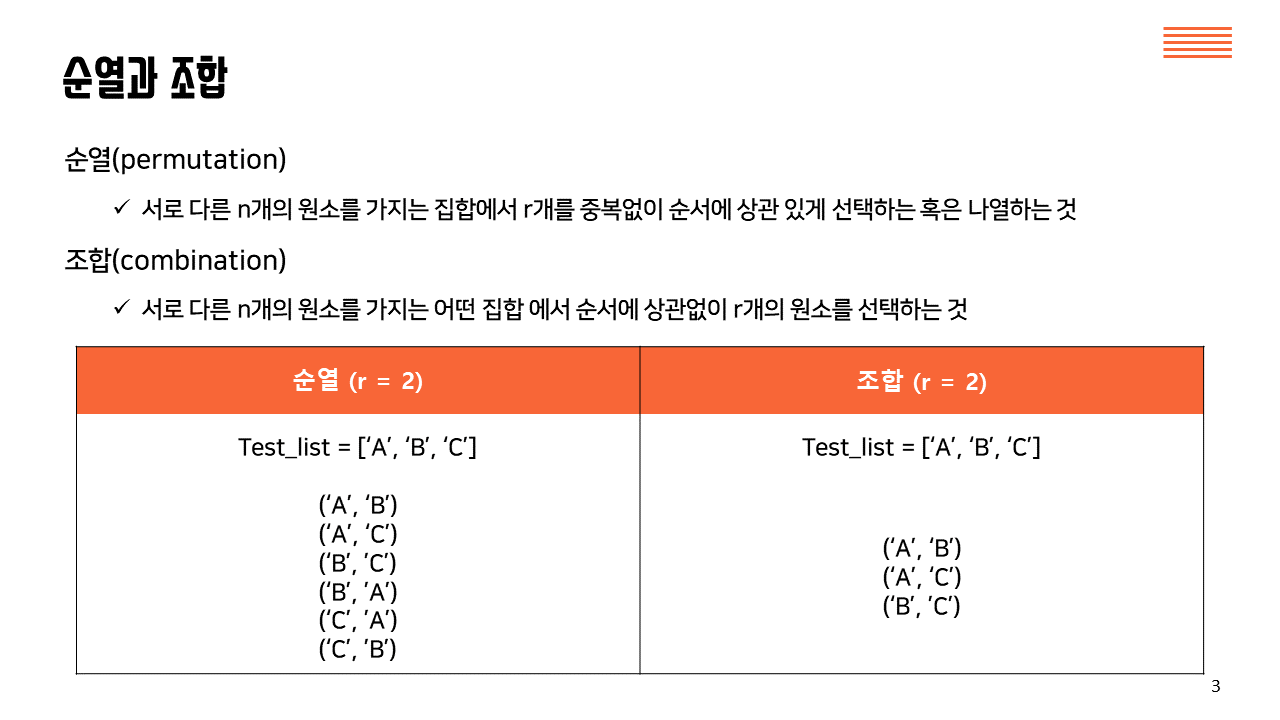

위에서 필요한 조합은:

iPhone, Apple Airpods Headphones

Apple Airpods Headphones, Wired Headphones

iPhone, Wired Headphones

(!) 순열과 조합에 대한 문제

In [ ]:
from itertools import combinations # 조합, 순열은 permuatations
list(combinations(['iPhone', 'Apple Airpods Headphones', 'Wired Headphones'], 2))

In [ ]:
count = Counter()

for line in multiple2['list_sorted']:
    count.update(Counter(combinations(line, 2)))

In [ ]:
for key,value in count.most_common(10):
    print(key, value)  # 이러한 조합이 자주 팔린다는 건, 이런 제품들을 대상으로 마케팅 활동을 펼칠 수 있음
# 실제 (예전) 대형마트에서는 이러한 방식과 + "market basket analysis"의 조합을 통해, 제품의 최적 배치를 고민함